# Линейная алгебра. Лабораторная работа 1, зима 2021, пилотный поток

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [2]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных &mdash; это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [18]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`.

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` &mdash; это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` &mdash; это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` &mdash; это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

А сейчас мы в качестве примера создадим единичную матрицу:

In [2]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [8]:
Z = np.zeros((3, 4))
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [6]:
B = np.diagflat([1, 2, 3, 4, 5])
print(B)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [9]:
print(np.trace(B))

15


In [10]:
invB = sla.inv(B)
print(invB)

[[ 1.          0.          0.          0.         -0.        ]
 [ 0.          0.5         0.          0.         -0.        ]
 [ 0.          0.          0.33333333  0.         -0.        ]
 [ 0.          0.          0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [11]:
X = np.random.rand(4, 5)
print(X)

[[0.47514069 0.02596408 0.58702351 0.96643728 0.53262721]
 [0.21549434 0.18578081 0.78086982 0.27523774 0.59377294]
 [0.51627228 0.18568761 0.81584093 0.810203   0.54363884]
 [0.47556505 0.93297136 0.55783389 0.61610301 0.2994644 ]]


In [15]:
Y = np.array([[X[1, 0], X[1, 1]], [X[2, 0], X[2, 1]]])
print(Y)
print(sla.det(Y))

[[0.21549434 0.18578081]
 [0.51627228 0.18568761]]
-0.05589885202680776


In [16]:
print(np.dot(X.T, X))

[[0.76489568 0.59192525 1.13367415 1.22978827 0.80410804]
 [0.59192525 0.94010409 0.83224675 0.80147767 0.5044795 ]
 [1.13367415 0.83224675 1.93112935 1.78692617 1.38689828]
 [1.22978827 0.80147767 1.78692617 2.04576866 1.30313826]
 [0.80410804 0.5044795  1.38689828 1.30313826 1.02148017]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [13]:
def my_det(X):
    '''
    Parameters
    ----------
    X : array_like
    
    Returns
    -------
    det : float
        Determinant of `a`.
    '''
    
    det = 1
    if len(X) != len(X[0]):
        raise ValueError
    n = len(X)
    X = np.dot(X, np.eye(n))
    for i in range(n):
        k = i + 1
        while k < n and X[i][i] == 0:
            if X[k][i] != 0:
                det *= -1
                t = X[i,:].copy()
                X[i,:] = X[k,:]
                X[k,:] = t
                break
            k += 1
            if k == n:
                return 0
        for j in range(i + 1, n):
            d = X[j][i] / X[i][i]
            X[j,:] -= X[i,:] * d
    for i in range(n):
        det *= X[i][i]
    
    return det

Простая проверка:

In [14]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [15]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

33 µs ± 5.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
398 µs ± 176 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
138 µs ± 55.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
28.6 ms ± 6.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
20.4 ms ± 628 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<ipython-input-13-f5908c5b3084>:34: RuntimeWarning: overflow encountered in double_scalars
  det *= X[i][i]


7.43 s ± 1.48 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


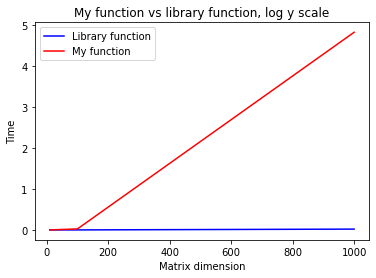

In [16]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

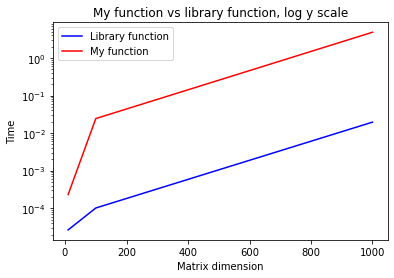

In [17]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [3]:
A = np.array([[1, 0], [10**20, 1]])
B = np.array([[10**(-20), 1], [0, 1 - 10**20]])
print('без десятичных точек: ')
print(np.dot(A, B))
A1 = np.array([[1., 0.], [(10.)**20, 1.]])
B1 = np.array([[(10.)**(-20), 1.], [0., 1. - (10.)**20]])
print('с десятичными точками: ')
print(np.dot(A1, B1))

без десятичных точек: 
[[1e-20 1]
 [1.0 1]]
с десятичными точками: 
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
Правильный ответ - первый

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [2]:
def my_pascal(dim):
    '''
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    '''
    P = np.zeros((dim, dim))
    
    for i in range(dim):
        for j in range(dim):
            P[i][j] = 1
    
    for i in range(1, dim):
        for j in range(1, dim):
            P[i][j] = P[i - 1][j] + P[i][j - 1]
    
    return P

Чему равен её определитель? Обязательно объясните свой ответ.

----
Будем вычитать из строки предыдущую, начиная с самой нижней и заканчивая второй. После первого прохода на позиции $P_{ij}$ будет находиться число $C_{i+j}^i - C_{i+j-1}^{i-1} = C_{i+j-1}^i = P_{i,j-1}$. Таким образом, все элементы матрицы, кроме первой строки, сдвинутся на 1 позицию влево, а в первом столбце будут стоять нули, начиная со второй строки. Повторим ту же операцию для строк от последней до третьей. Теперь элементы этих строк сдвинуты на две позиции. Повторим эти действия $dim$ раз, после чего элемены второй строки будут сдвинуты на 1 влево, третьей на 2 влево, ... последней на $dim - 1$ влево, а под главной диагональю будут стоять нули. Все строки начинаются с единиц, поэтому мы получили верхнетреугольную матрицу с единицами на диагонали, определитель которой равен 1.  

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [3]:
A = my_pascal(30)
print(sla.det(A))

7.223813481546793e+47


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [11]:
def prod_and_sq_sum(A):
    pr = np.prod(np.diag(A))
    sq_sum = sum(np.square(np.diag(A)))
    return pr, sq_sum


a = np.array([[1, 3, 5], [4, 6, 6], [7, 5, 3]])
print(*prod_and_sq_sum(a))

18 46


**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

In [12]:
def f(A, B, k):
    m, n = A.shape
    k = min(n, k) #наверное в условии опечатка, и должно быть min(k, n)
    A = A[:, :k]
    B = B[:, :k]
    B = B.T
    A_cols = np.hsplit(A, k)
    B_cols_t = np.vsplit(B, k)
    res = sum(np.multiply(A_cols, B_cols_t))
    return res


a = np.array([[1, 3, 5], 
              [4, 6, 6], 
              [7, 5, 3],
              [5, 5, 0]])
b = np.array([[2, 6, 3], 
              [7, 5, 2], 
              [0, 3, 7],
              [7, 2, 10]])
print(f(a, b, 1))
print(f(a, b, 3))

[[ 2  7  0  7]
 [ 8 28  0 28]
 [14 49  0 49]
 [10 35  0 35]]
[[ 35  32  44  63]
 [ 62  70  60 100]
 [ 53  80  36  89]
 [ 40  60  15  45]]


**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [13]:
def get_diag(A, B):
    m, k = A.shape
    k, n = B.shape
    B = B.T
    A_rows = np.vsplit(A, m)
    B_cols = np.vsplit(B, n)
    res = np.multiply(A_rows, B_cols).sum()
    return res


a = np.array([[2, 6, 3, 7], 
              [7, 5, 2, 2], 
              [0, 3, 7, 10]])
b = np.array([[1, 3, 5], 
              [4, 6, 6], 
              [7, 5, 3],
              [5, 5, 0]])
print(np.trace(np.dot(a, b)))
print(get_diag(a, b))

192
192


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

**Внимание!** При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Решения, в которых в какой-либо момент работа происходит не с комплексным числом как таковым, а с парой вещественных, будут оцениваться нулём баллов. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [14]:
def shrink_rotate(x, a, coef=1., angle=0.):
    x -= a
    x *= coef
    y = x * (np.cos(angle) + np.sin(angle) * 1j)
    return y
    raise NotImplementedError()
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    x -= a
    x *= coef
    y = x * (np.cos(angle) + np.sin(angle) * 1j)
    return y.conjugate()
    raise NotImplementedError()
    
def geometric_inverse(x, a, r):
    y = x - a
    y1 = r**2 / y.conjugate()
    return y1
    raise NotImplementedError()

**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

<Figure size 1440x1440 with 0 Axes>

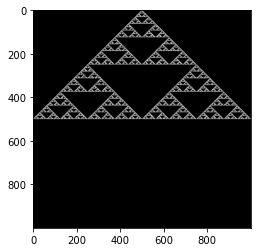

<Figure size 1440x1440 with 0 Axes>

In [56]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

M = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        M[int(500 + z.imag * 500)][int(500 + z.real * 500)] = 1
plt.imshow(M, cmap='gray')
plt.figure(figsize=(20, 20))

**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

Код приводит в действие алгоритм "Игры хаоса". Случайно выбирается одна из трех вершин треугольника, и точка приближается к ней на расстояние, равное половине начального расстояния от точки до вершины.

Теперь докажем, почему в результате алгоритма получается треугольник Серпинского.

1. Почему точка на треугольнике Серпинского после итерации остается на треугольнике Серпинского?

Ведем обозначения: 1 - верхний подтреугольник, 2 - левый подтреугольник, 3 - правый подтреугольник. Тогда запись (3,1,1) обозначает, что точка находится в верхнем подтреугольнике верхнего подтреугольника правого подтреугольника главного треугольника Серпинского (на графике примерно на координате (600, 400), чтобы было попонятнее). Назовем количество чисел в такой записи "порядком треугольника". Все подтреугольники подобны друг другу, а значит для любого подтреугольника найдется другой треугольник, который в 2 раза меньше первого и находится в 2 раза ближе к вершине (выполняется для всех трех вершин). Эти два треугольника можно подстроить, дописав в начало 1, 2 или 3 к данному треугольнику. Например для теугольника (1, 3) такими будут треугольники (1, 1, 3), (2, 1, 3), (3, 1, 3). Таким образом, если точка лежит на стороне некого подтреугольника $(i_1, i_2, \dots i_k)$, то после итерации она будет лежать на стороне одного из треугольников $(1, i_1, i_2, \dots i_k)$, $(2, i_1, i_2, \dots i_k)$, $(3, i_1, i_2, \dots i_k)$. Если вдруг картинку видно не будет, скину ее отдельно. 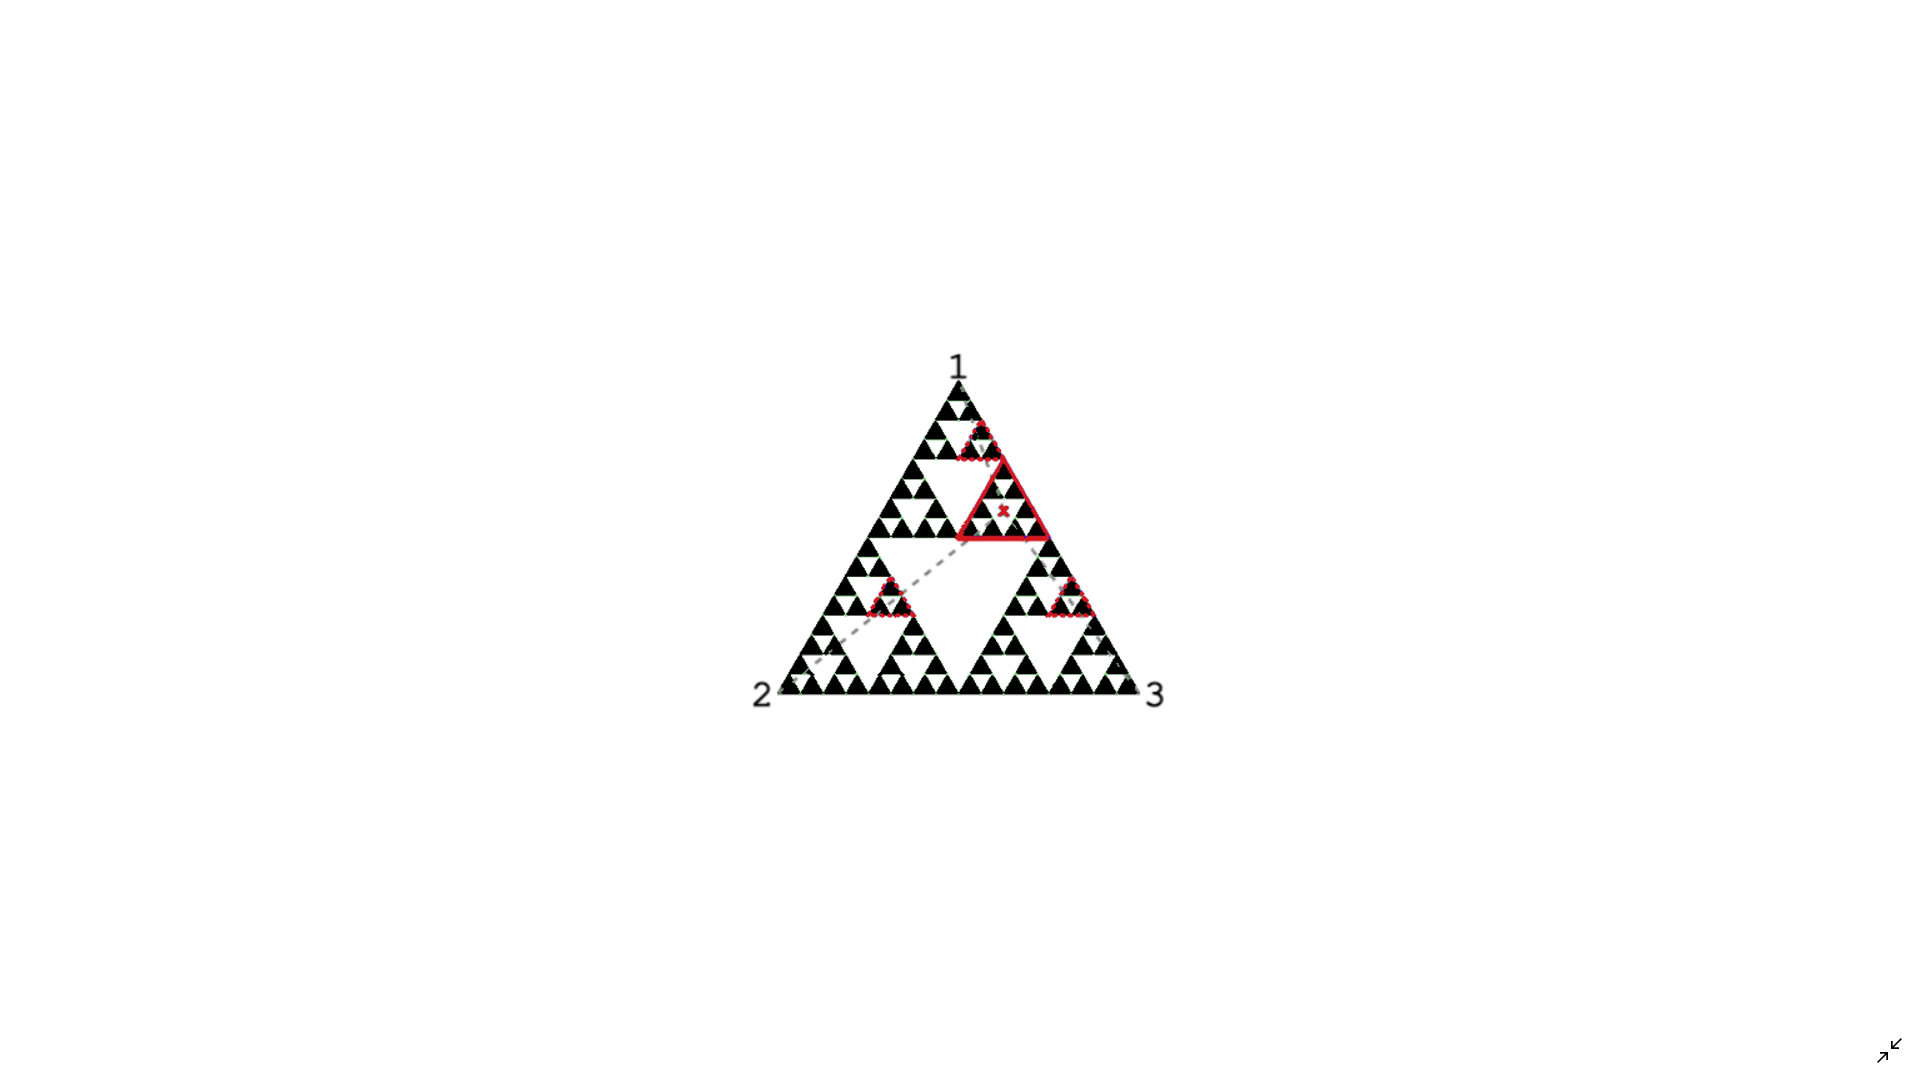

Вообще, можно еще доказать, что точка, находящаяся вне треугольника, через некоторое число шагов приблизится к нему настолько, что не будет отличима от точки на треугольнике, но у нас начальная точка лежит на стороне, и мне не очень хочется много писать.

2. Почему алгоритм покрывает все точки треугольника Серпинского?

Вообще, во фрактале бесконечное множество точек, поэтому переформулируем вопрос: можем ли мы приблизиться в любую $\epsilon$ окрестность любой точки за конечное число шагов?

Рассмотрим подтреугольник $n$-го порядка. С добавлением числа к порядку сторона подтреугольника уменьшается вдвое, значит можно считать, что расстояние между любыми двумя точками этого подтреугольника не больше $2^{-n}$, и если $n = \lceil -\log_2\epsilon \rceil$, то соседние точки подтреугольника порядка $n$ находятся на расстоянии не больше $\epsilon$.

Пусть игра хаоса началась в точке $q_0 \in (i_1, \dots i_k), k = \lceil -\log_2\epsilon \rceil$. Через $n$ шагов она перейдет в точку подтреугольника $(j_1, \dots j_n, i_1, \dots i_k)$. Найдем вероятность того, что за эти $n$ шагов точка побывала в $\epsilon$ окрестностях всех точек треугольника Серпинского.

Вероятность того, что в процессе алгоритма был посещен какой-то конкретный подтреугольник порядка $k$ равна вероятности того, что подстрока длины $k$, соответствующая этому треугольнику принадлежит строке $(j_1, \dots j_n, i_1, \dots i_k)$. Рассмотрим подстроки $(j_1, \dots j_k), (j_{k + 1}, \dots j_{2k}), \dots$ - непересекающиеся подстроки длины $k$, начиная с первого символа. Такие строки независят друг от друга, их количество равно $\left\lfloor \dfrac{n}{k} \right\rfloor$, а вероятность, что такая подстрока совпвдет с подстрокой, соответсвующей выбранному треугольнику, равна $3^{-k}$. Тогда вероятность того, что хотя бы одна из подстрок совпадает со строкой выбранного треугольника равна $1 - (1 - 3^{-k})^{\left\lfloor \frac{n}{k} \right\rfloor} = 1 - (1 - 3^{\lceil \log_2\epsilon \rceil})^{\left\lfloor \frac{n}{\lceil -\log_2\epsilon \rceil} \right\rfloor} \to 1$ при $n \to \infty$. 

Получаем, что при большом количестве итераций вероятность побывать в $\epsilon$ окрестности произвольной точки стремится к единице, значит при большом количестве итераций алгоритм покроет $\epsilon$ окрестности всех точек треугольника Серпинского.

**Задание 5.6** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

<Figure size 1440x1440 with 0 Axes>

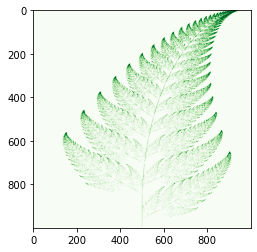

<Figure size 1440x1440 with 0 Axes>

In [13]:
def cool_transformation(x, a, b, c, d, f):
    return (a * (x.real) + b * (x.imag)) + (c * (x.real) + d * (x.imag) + f) * 1j
    raise NotImplementedError()


z = 0.5 + 0.*1j
max_iter = 100000
funcs = [(lambda t: cool_transformation(t, 0, 0, 0, 0.16, 0))]
funcs += [(lambda t: cool_transformation(t, 0.85, 0.04, -0.04, 0.85, 1.60))] * 85
funcs += [(lambda t: cool_transformation(t, 0.20, -0.26, 0.23, 0.22, 1.60))] * 7
funcs += [(lambda t: cool_transformation(t, -0.15, 0.28, 0.26, 0.24, 0.44))] * 7

M = np.zeros((1000, 1000))
for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter >= 10:
        M[1000 - int(z.imag * 100)][int((z.real + 3) * (1000/6))] = 1
plt.imshow(M, cmap='Greens')
plt.figure(figsize=(20, 20))



Получается лист папоротника. Это известный фрактал, но мне всегда хотелось реализовать его самому и поделиться с другими! Я вдохновлялся этим видео: https://www.youtube.com/watch?v=kbKtFN71Lfs. И вообще, если вы не знакомы с каналом numberfile, то это очень крутой канал по математике, советую посмотреть на досуге)

## Часть 6. Функции от матриц

Пусть $A$ -- некоторая квадратная матрица. В некоторых приложениях возникает необходимость вычислить какую-нибудь сложную функцию от матрицы. Например, экспоненту или синус. Это можно делать с помощью разложения в ряд, но мы пойдем другим путем. В этой задаче мы продемонстрируем другой метод:

1) Посчитаем какой-нибудь аннулирующий многочлен для матрицы $A$. Пусть это будет $f(x)$.

2) Разложим многочлен $f$ на множители следующим образом $f(x) = (x-\lambda_1)^{k_1}\ldots (x-\lambda_r)^{k_r}$.

3) Пусть $\phi$ -- гладкая функция, значение которой мы хотим посчитать на матрице $A$. Найдем какой-нибудь многочлен $g_\phi$ степени меньше, чем степень $f$ со следующими свойствами: $g_\phi(\lambda_i)^{(d)} = \phi^{(d)}(\lambda_i)$ для всех $0 \leqslant d < k_i$. То есть во всех корнях $f$ все производные $g_\phi$ до кратности корня должны совпасть с производными $\phi$.

4) Утверждается, что $\phi(A) = g_\phi(A)$ (и в частности не зависит от выбора многочлена $g_\phi$ с указанными свойствами).

**А теперь задание**

Каждая группа будет работать со своей матрицей:

- у группы 211:

`A = np.array([[-1,1,2,-2],[-5,4,3,-4],[0,0,2,-1],[1,0,-1,1]])`

- у группы 212:

`A = np.array([[-3,5,-5,-7],[-10,12,-9,-15],[5,-2,-2,1],[-9,7,-2,-7]])`

- у группы 214:

`A = np.array([[-6,-4,3,6],[1,-3,0,-1],[-1,-1,-5,0],[1,1,1,-4]])`

 

Посчитайте указанным способом:
 

1) $B = e^A$.
 
2) $S = \sin A$.

3) $T = \cos A$.

4) Проверьте равенство $S^2 + T^2 = E$, то есть $\sin^2 A + \cos^2 A = E$.

5) $\ln (B)$ и проверьте, что полученная матрица совпадает с $A$.

 

In [161]:
A = np.array([[-6, -4, 3, 6], [1, -3, 0, -1], [-1, -1, -5, 0], [1, 1, 1, -4]])
E = np.eye(4)
print('собственные значения: ', *sla.eig(A)[0])
print('без погрешности: ', -5, -5, -4, -4)
print('характеристический многочлен: ', 'X = (x + 4)^2 * (x + 5)^2')
print('проверка: (A + 4)^2 * (A + 5)^2 = ')
print(np.dot(np.dot(A + 4 * E, A + 4 * E), np.dot(A + 5 * E, A + 5 * E)))
lmbd1, lmbd2, k1, k2 = -5, -4, -2, -2
print('g_f = a_0 * x^3 + a_1 * x^2 + a_2 * x + a_3')
print('g\'_f = 3 * a_0 * x^2 + 2 * a_1 * x + a_2')

coefs = np.array([[lmbd1**3, lmbd1**2, lmbd1, 1],
                  [3 * lmbd1**2, 2 * lmbd1, 1, 0],
                  [lmbd2**3, lmbd2**2, lmbd2, 1],
                  [3 * lmbd2**2, 2 * lmbd2, 1, 0]])

собственные значения:  (-5.00000003202468+0j) (-4.99999996797532+0j) (-4+2.2644868065464278e-08j) (-4-2.2644868065464278e-08j)
без погрешности:  -5 -5 -4 -4
характеристический многочлен:  X = (x + 4)^2 * (x + 5)^2
проверка: (A + 4)^2 * (A + 5)^2 = 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
g_f = a_0 * x^3 + a_1 * x^2 + a_2 * x + a_3
g'_f = 3 * a_0 * x^2 + 2 * a_1 * x + a_2


In [162]:
def exp(x):
    return np.e**x

def expD1(x):
    return np.e**x

F_exp = [exp(lmbd1), expD1(lmbd1), exp(lmbd2), expD1(lmbd2),]

g_exp = sla.solve(coefs, F_exp)

print('коэффициенты многочлена g: ', *g_exp)

B = np.linalg.matrix_power(A, 3) * g_exp[0] + np.linalg.matrix_power(A, 2) * g_exp[1] + A * g_exp[2] + E * g_exp[3]

print('B = e^A = ')
print(B)

коэффициенты многочлена g:  0.0018982021085222004 0.031414574409874066 0.17851853295866105 0.3512415151108142
B = e^A = 
[[ 2.77555756e-16 -3.17915329e-02  3.66312778e-02  6.16848637e-02]
 [ 6.73794700e-03  1.53740961e-02  1.15776919e-02  9.67948978e-03]
 [-6.73794700e-03  2.94154278e-03 -1.15776919e-02 -2.79951287e-02]
 [ 6.73794700e-03 -2.94154278e-03  2.98933308e-02  4.63107676e-02]]


In [163]:
def sin(x):
    return np.sin(x)

def sinD1(x):
    return np.cos(x)

F_sin = [sin(lmbd1), sinD1(lmbd1), sin(lmbd2), sinD1(lmbd2)]

g_sin = sla.solve(coefs, F_sin)

print('коэффициенты многочлена g: ', *g_sin)

S = np.linalg.matrix_power(A, 3) * g_sin[0] + np.linalg.matrix_power(A, 2) * g_sin[1] + A * g_sin[2] + E * g_sin[3]

print('S = sin(A) = ')
print(S)

коэффициенты многочлена g:  0.03426212331003483 -0.006114238477948675 -2.347139447568873 -6.341151587478156
S = sin(A) = 
[[ 0.67526209 -0.64886478 -0.57210321 -0.20690062]
 [ 0.28366219  2.01203261 -0.93730581 -1.70675196]
 [-0.28366219 -1.25523012  2.34775192  2.36039558]
 [ 0.28366219  1.25523012 -1.59094943 -1.60359308]]


In [164]:
def cos(x):
    return np.cos(x)

def cosD1(x):
    return -np.sin(x)

F_cos = [cos(lmbd1), cosD1(lmbd1), cos(lmbd2), cosD1(lmbd2)]

g_cos = sla.solve(coefs, F_cos)

print('коэффициенты многочлена g: ', *g_cos)

T = np.linalg.matrix_power(A, 3) * g_cos[0] + np.linalg.matrix_power(A, 2) * g_cos[1] + A * g_cos[2] + E * g_cos[3]

print('T = cos(A) = ')
print(T)

коэффициенты многочлена g:  0.15888484268260816 2.246006265892815 9.5847751830694 11.917986788815872
T = cos(A) = 
[[ 1.24258646  3.81407863 -2.65303258 -5.50818693]
 [-0.95892427 -1.65580483  0.20212178  1.18266452]
 [ 0.95892427  1.00216121 -0.0989629  -0.42586203]
 [-0.95892427 -1.00216121 -0.55468072 -0.22778159]]


In [165]:
print('S^2 + T^2 = ')
print(np.dot(S, S) + np.dot(T, T))
print('на диагонали полученной матрицы стоят единицы, а остальные элементы отличаются от нуля не более чем на 10^-13.') 
print('С малой погрешностью, мы получили единичную матрицу.')

S^2 + T^2 = 
[[ 1.00000000e+00 -3.50830476e-14  2.18713936e-14  2.82551760e-14]
 [ 8.99280650e-15  1.00000000e+00 -1.15463195e-14 -2.48689958e-14]
 [-1.04360964e-14 -2.44249065e-14  1.00000000e+00  2.30926389e-14]
 [ 7.10542736e-15  1.90958360e-14 -5.77315973e-15  1.00000000e+00]]
на диагонали полученной матрицы стоят единицы, а остальные элементы отличаются от нуля не более чем на 10^-13.
С малой погрешностью, мы получили единичную матрицу.


In [168]:
arr = [i.real for i in sla.eig(B)[0]]
print('собственные значения: ', *arr)
lmbd_B1, lmbd_B2 = arr[0], arr[2]

coefs_B = np.array([[lmbd_B1**3, lmbd_B1**2, lmbd_B1, 1],
                  [3 * lmbd_B1**2, 2 * lmbd_B1, 1, 0],
                  [lmbd_B2**3, lmbd_B2**2, lmbd_B2, 1],
                  [3 * lmbd_B2**2, 2 * lmbd_B2, 1, 0]])

def ln(x):
    return np.log(x)

def lnD1(x):
    return 1 / x

F_ln = [ln(lmbd_B1), lnD1(lmbd_B1), ln(lmbd_B2), lnD1(lmbd_B2)]

print(F_ln)

g_ln = sla.solve(coefs_B, F_ln)

print('коэффициенты многочлена g: ', *g_ln)

C = np.linalg.matrix_power(B, 3) * g_ln[0] + np.linalg.matrix_power(B, 2) * g_ln[1] + B * g_ln[2] + E * g_ln[3]

print('C = ln(B) = ')
print(C)
print(A)
print('Элементы полученной матрицы отличаются от соответствующих элементов А не более чем на 10^-7.')
print('С малой погрешностью, мы получили матрицу A.')

собственные значения:  0.006737946999085536 0.006737946999085536 0.018315637849343126 0.01831563992812555
[-4.999999999999989, 148.41315910257507, -4.0000000567488305, 54.59815313152548]
коэффициенты многочлена g:  225788.14399908684 -12536.745828883451 286.6047193383401 -6.4310291456991875
C = ln(B) = 
[[-6.00000000e+00 -4.00000000e+00  3.00000005e+00  6.00000005e+00]
 [ 1.00000000e+00 -3.00000000e+00  5.17845788e-08 -9.99999948e-01]
 [-1.00000000e+00 -1.00000000e+00 -5.00000010e+00 -1.03569194e-07]
 [ 1.00000000e+00  1.00000000e+00  1.00000010e+00 -3.99999990e+00]]
[[-6 -4  3  6]
 [ 1 -3  0 -1]
 [-1 -1 -5  0]
 [ 1  1  1 -4]]
Элементы полученной матрицы отличаются от соответствующих элементов А не более чем на 10^-7.
С малой погрешностью, мы получили матрицу A.


Теперь попробуем поиграться с матрицами по-другому.

1) Возьмите матрицу $A$ из предыдущего задания и посчитайте $e^A$ с помощью подстановки в следующий ряд $e^x = \sum_{k = 0}^\infty \frac{x^k}{k!}$. Вычисление надо проводить так, надо считать сумму $\sum_{k = 0}^n \frac{A^k}{k!}$ до тех пор, пока максимум коэффициентов $A^{k+1} / (k+1)!$ не будет меньше заданной точности. Подумайте, как лучше организовать вычисления для подсчета частичной суммы.

2) Возьмите случайную матрицу $A$ размером $10$ на $10$ и найдите $\sin^2 A + \cos^2 A$ воспользовавшись рядами $\sin x = \sum_{k=0}^\infty \frac{(-1)^k x^{2k + 1}}{(2k + 1)!}$ и $\cos x = \sum_{k=0}^\infty \frac{(-1)^kx^{2k}}{(2k)!}$. Проверьте, получилась ли единичная матрица.

In [55]:
A = np.array([[-6, -4, 3, 6], [1, -3, 0, -1], [-1, -1, -5, 0], [1, 1, 1, -4]])

def CheckDeviation(b, delta):
    for i in range(4):
        for j in range(4):
            if abs(b[i][j]) > delta:
                return False
    return True

def TaylorExp(a):
    summ = np.eye(4)
    k = 1
    b = np.eye(4)
    while True:
        b = np.dot(b, (a / k))
        summ += b
        if CheckDeviation(b, 10**(-15)):
            break
        k += 1
    return summ

print('матрица e^A, посчитанная с точностью до 10^(-15) :')
print(TeylorExp(A))
print('матрица В, посчитанная ранее :')
print(B)
print('С малой погрешностью получен одинаковый результат')

матрица e^A, посчитанная с точностью до 10^(-15) :
[[ 6.12996588e-15 -3.17915329e-02  3.66312778e-02  6.16848637e-02]
 [ 6.73794700e-03  1.53740961e-02  1.15776919e-02  9.67948978e-03]
 [-6.73794700e-03  2.94154278e-03 -1.15776919e-02 -2.79951287e-02]
 [ 6.73794700e-03 -2.94154278e-03  2.98933308e-02  4.63107676e-02]]
матрица В, посчитанная ранее :
[[ 2.77555756e-16 -3.17915329e-02  3.66312778e-02  6.16848637e-02]
 [ 6.73794700e-03  1.53740961e-02  1.15776919e-02  9.67948978e-03]
 [-6.73794700e-03  2.94154278e-03 -1.15776919e-02 -2.79951287e-02]
 [ 6.73794700e-03 -2.94154278e-03  2.98933308e-02  4.63107676e-02]]
С малой погрешностью получен одинаковый результат


In [212]:
A = np.random.rand(10, 10)

def CheckDeviation(b, delta):
    for i in range(10):
        for j in range(10):
            if abs(b[i][j]) > delta:
                return False
    return True

def TaylorSin(a):
    a2 = np.dot(a, a)
    summ = a
    k = 1
    b = a
    while True:
        k += 2
        b = (-1) * np.dot(b, a2) / (k * (k - 1))
        summ += b
        if CheckDeviation(b, 10**(-100)):
            break
    return summ

def TaylorCos(a):
    a2 = np.dot(a, a)
    summ = np.eye(10)
    k = 0
    b = np.eye(10)
    while True:
        k += 2
        b = (-1) * np.dot(b, a2) / (k * (k - 1))
        summ += b
        if CheckDeviation(b, 10**(-100)):
            break
    return summ

sin_A = TaylorSin(A)
cos_A = TaylorCos(A)
res = np.dot(sin_A, sin_A) + np.dot(cos_A, cos_A)
print(res)
print('Максимальное отклонение от единичной матрицы: ')
print(max(abs(np.max(res - np.eye(10))), abs(np.min(res - np.eye(10)))))
print('Среднее отклонение от единичной матрицы: ')
print(np.average(res - np.eye(10)))

[[ 9.71923073e-01  5.68315044e-02  9.28487398e-03  3.77883722e-02
   1.74077754e-02 -1.22405363e-02  4.80985861e-02 -1.91993288e-02
  -1.73129060e-02  5.28120622e-02]
 [ 8.17904529e-03  9.78854519e-01  6.15333088e-02  4.96274769e-02
  -5.70571349e-04  2.94421987e-02  7.18957252e-03  8.31159568e-03
  -5.64193625e-03 -2.77271770e-02]
 [ 6.96963767e-02 -3.70952198e-02  9.85408545e-01  5.95970236e-04
   1.75972331e-02 -5.16761475e-03 -1.12047565e-02  2.33485325e-02
   4.97317011e-02  5.78196017e-02]
 [ 1.98816642e-03  8.87522376e-02 -2.45813059e-02  9.56281673e-01
   3.86580429e-02  5.19941805e-02 -2.20320916e-02  7.41063539e-02
   1.23072966e-03  2.35885885e-02]
 [ 5.55777463e-02 -1.82835211e-02 -2.24773634e-02 -6.27640872e-03
   1.00691017e+00  1.82303462e-02  1.46348282e-02  4.72667141e-03
   4.36385204e-02  2.25625026e-02]
 [ 3.07918109e-02  2.36229138e-02  4.17149849e-03 -7.11495744e-02
   5.24591268e-02  9.76342308e-01 -6.02428520e-02  3.30193030e-02
   3.09854823e-02  7.16113517e-02

## Часть 7 (бонус). Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ &mdash; матрица размера $n\times n$, а $B$ &mdash; матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и одинаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000; например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000; например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимание на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

In [27]:
def Gauss(A, B):
    n, m = B.shape
    a, b = A.copy(), B.copy()
    X = np.zeros((n, m))
    for i in range(n):
        k = i + 1
        while a[i][i] == 0:
            if a[k][i] != 0:
                t = a[i,:].copy()
                a[i,:] = a[k,:]
                a[k,:] = t
                t = b[i,:].copy()
                b[i,:] = b[k,:]
                b[k,:] = t
                break
            k += 1
        for j in range(i + 1, n):
            d = a[j][i] / a[i][i]
            a[j,:] -= a[i,:] * d
            b[j,:] -= b[i,:] * d
    for col in range(m): 
        X[n - 1][col] = b[n - 1][col] / a[n - 1][n - 1]
        for i in range(n - 2, -1, -1):
            X[i][col] = b[i][col]
            for j in range(i + 1, n):
                X[i][col] -= a[i][j] * X[j][col]
            X[i][col] /= a[i][i]
    return X

In [28]:
def Stairs(a, a_inv):
    A = a.copy()
    A_inv = a_inv.copy()
    n = len(A)
    for i in range(n):
        k = i + 1
        while A[i][i] == 0:
            if A[k][i] != 0:
                t = A[i,:].copy()
                A[i,:] = A[k,:]
                A[k,:] = t
                t = A_inv[i,:].copy()
                A_inv[i,:] = A_inv[k,:]
                A_inv[k,:] = t
                break
            k += 1
        for j in range(i + 1, n):
            d = A[j][i] / A[i][i]
            A[j,:] -= A[i,:] * d
            A_inv[j,:] -= A_inv[i,:] * d

    return A, A_inv


def StairsInv(a, a_inv):
    A = a.copy()
    A_inv = a_inv.copy()
    n = len(A)
    for i in range(n - 1, -1, -1):
        k = i - 1
        while A[i][i] == 0:
            if A[k][i] != 0:
                t = A[i,:].copy()
                A[i,:] = A[k,:]
                A[k,:] = t
                t = A_inv[i,:].copy()
                A_inv[i,:] = A_inv[k,:]
                A_inv[k,:] = t
                break
            k -= 1
        for j in range(i - 1, -1, -1):
            d = A[j][i] / A[i][i]
            A[j,:] -= A[i,:] * d
            A_inv[j,:] -= A_inv[i,:] * d

    return A, A_inv

def SolveInv(a, b):
    A, B = a.copy(), b.copy()
    n, m = B.shape
    A_inv = np.eye(n)
    A, A_inv = Stairs(A, A_inv)
    A, A_inv = StairsInv(A, A_inv)

    for i in range(n):
        for p in range(n):
            A_inv[i][p] *= 1 / A[i][i]
        A[i][i] = 1

    X = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            X[i][j] = np.sum(A_inv[i,:] * B[:,j])

    return X

3.05 ms ± 619 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.09 ms ± 665 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
38.9 ms ± 16.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
34.8 ms ± 10.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
261 ms ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
211 ms ± 54.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
901 ms ± 226 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
920 ms ± 215 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.37 s ± 1.64 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.87 s ± 606 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
27.1 s ± 2.64 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
30.6 s ± 2.24 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


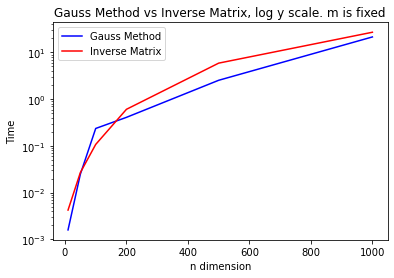

In [29]:
gauss_times = []
inv_times = []
dimensions = [10, 50, 100, 200, 500, 1000]
m = 10
for n in dimensions:
    A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    res_gauss = %timeit -o Gauss(A, B)
    gauss_times.append(res_gauss.best)
    res_inv = %timeit -o SolveInv(A, B)
    inv_times.append(res_inv.best)

plt.semilogy(dimensions, gauss_times, color='blue', label='Gauss Method')
plt.semilogy(dimensions, inv_times, color='red', label='Inverse Matrix')
plt.title('Gauss Method vs Inverse Matrix, log y scale. m is fixed')
plt.ylabel('Time')
plt.xlabel('n dimension')
plt.legend()

266 ms ± 28.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
289 ms ± 27.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.4 s ± 273 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
435 ms ± 75.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.42 s ± 918 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.47 s ± 146 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
12.1 s ± 2.46 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.6 s ± 486 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
29 s ± 2.48 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.27 s ± 263 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1min 19s ± 2.51 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.7 s ± 382 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2min 51s ± 3.79 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
22.3 s ± 1.21 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


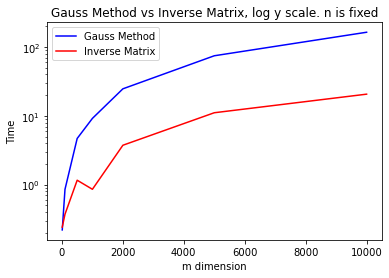

In [30]:
gauss_times = []
inv_times = []
dimensions = [10, 100, 500, 1000, 2000, 5000, 10000]
n = 100
for m in dimensions:
    A = np.random.rand(n, n)
    B = np.random.rand(n, m)
    res_gauss = %timeit -o Gauss(A, B)
    gauss_times.append(res_gauss.best)
    res_inv = %timeit -o SolveInv(A, B)
    inv_times.append(res_inv.best)

plt.semilogy(dimensions, gauss_times, color='blue', label='Gauss Method')
plt.semilogy(dimensions, inv_times, color='red', label='Inverse Matrix')
plt.title('Gauss Method vs Inverse Matrix, log y scale. n is fixed')
plt.ylabel('Time')
plt.xlabel('m dimension')
plt.legend()

Вывод: по построенным графикам видно, что метод Гаусса работает немного быстрее при фиксированном m и n от 10 до 1000, а при фиксированном n и m от 10 до 10000 заметно быстрее метод поиска обратной матрицы. 

Надем количество оперераций (будем рассматривать только операции суммарной степени 3):

В методе Гаусса имеем:

    for i in range(n):
        for j in range(i + 1, n): 
            fa[j,:] -= a[i,:] * d     # 2n операций
            b[j,:] -= b[i,:] * d      # 2m операций

    for col in range(m):
        for i in range(n - 2, -1, -1):
            for j in range(i + 1, n):
                X[i, col] -= a[i, j] * X[j, col]  #две операции


Для остальных операций степень при их числе в общей сумме меньше 3, значит их число мало.
Цикл j от i + 1 до n - 1 выполняется $1 + 2 + \dots + n - 1 = \dfrac{n(n - 1)}{2}$ раз.
Тогда общее число равно: $\dfrac{n(n - 1)}{2} \cdot 2(n + m) + m \cdot 2\dfrac{n(n - 1)}{2} = n(n - 1)(n + 2m)$

В методе с поиском обратной матрицы имеем:

    for i in range(n):                          #весь этот цикл выполняется два раза
        for j in range(i + 1, n):                 
            A[j,:] -= A[i,:] * d             # 2n операций
            A_inv[j,:] -= A_inv[i,:] * d     # 2n операций
    
    for i in range(n):
        for j in range(m):
            X[i][j] = np.sum(A_inv[i,:] * B[:,j])    # 2n операций (n умножений и n сложений)

Общее число равно: $2\cdot4\cdot\dfrac{n(n - 1)}{2} + 2n^2m = 4n^2(n - 1) + 2n^2m$

1. При фиксированном $m = 10$

Метод Гаусса: $n(n - 1)(n + 20) = n^3 + 19n^2 - 20n$

Метод поиска обратной матрицы: $4n^2(n - 1) + 20n^2 = 4n^3 + 14n^2$

При $n > m$ число операций в методе Гаусса меньше.

2. При фиксированном $n = 100$

Метод Гаусса: $100(100 - 1)(100 + 2m) = 99\cdot10^4 + 19800m$

Метод поиска обратной матрицы: $4\cdot100^2(100 - 1) + 100^2m = 396\cdot10^4 + 10000m$

При $m >> n$ число операций в методе поиска обратной матрицы меньше.

Из подсчета числа операций можно сделать вывод, что метод Гаусса более чувствителен к росту m, а метод поиска обратной матрицы -- к росту n.

Таким образом при n >> m эффективнее будет метод Гаусса, а при m >> n эффективнее будет метод поиска обратной матрицы.